# New York City Airbnb 

Introduction:

Airbnb, launched in 2008, offers a platform where homeowners can rent out their spaces to travelers. While homeowners earn from their properties, travelers get diverse lodging choices. Airbnb charges a small fee for this service, both from the homeowner and the traveler.
For this project, I'm exploring Airbnb's data for New York City. The goal is to understand the factors influencing listing prices. By analyzing the data, I aim to uncover insights into how different listings in boroughs are priced and what factors play significant role in the popularity of listings.  As a regular Airbnb user and someone familiar with New York, this analysis will also help confirm or challenge my own perceptions about the city's rental landscape.

  
Hypothesis:

For our Airbnb NYC data exploration, we're particularly interested in understanding how certain features, such as the neighborhood group, type of room, and the number of reviews, might influence listing prices. To have a better guide, I've set these following hypothesis:

H0: Neighbourhood_group, room types, and number of reviews have no influence over Airbnb listing prices in NYC

H1: Neighbourhood_group, room types, and number of reviews have influence over Airbnb listing prices in NYC


 
Data Source:
This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values.
Source: https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('AB_NYC_2019.csv')
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


# Understanding and Cleaning Data

In [3]:
df.shape

(48895, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
df.describe(include='all')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48879,4.889500e+04,48874,48895,48895,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000,38843,38843.000000,48895.000000,48895.000000
unique,NaN,47905,NaN,11452,5,221,NaN,NaN,3,NaN,NaN,NaN,1764,NaN,NaN,NaN
top,NaN,Hillside Hotel,NaN,Michael,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2019-06-23,NaN,NaN,NaN
freq,NaN,18,NaN,417,21661,3920,NaN,NaN,25409,NaN,NaN,NaN,1413,NaN,NaN,NaN
mean,1.901714e+07,NaN,6.762001e+07,NaN,NaN,NaN,40.728949,-73.952170,NaN,152.720687,7.029962,23.274466,NaN,1.373221,7.143982,112.781327
std,1.098311e+07,NaN,7.861097e+07,NaN,NaN,NaN,0.054530,0.046157,NaN,240.154170,20.510550,44.550582,NaN,1.680442,32.952519,131.622289
min,2.539000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.499790,-74.244420,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000
25%,9.471945e+06,NaN,7.822033e+06,NaN,NaN,NaN,40.690100,-73.983070,NaN,69.000000,1.000000,1.000000,NaN,0.190000,1.000000,0.000000
50%,1.967728e+07,NaN,3.079382e+07,NaN,NaN,NaN,40.723070,-73.955680,NaN,106.000000,3.000000,5.000000,NaN,0.720000,1.000000,45.000000
75%,2.915218e+07,NaN,1.074344e+08,NaN,NaN,NaN,40.763115,-73.936275,NaN,175.000000,5.000000,24.000000,NaN,2.020000,2.000000,227.000000


In [6]:
#Checking for missing values in the dataset
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

'name' and 'host_name' have a small number of missing values. We can either drop these rows or impute them with 'Unknown'.

'reviews_per_month' and 'last_review' have a significant number of missing values. We'll impute 'reviews_per_month' with 0 and 
'last_review' with 'No Reviews'.

In [7]:
#Handling missing values
df['name'].fillna('Unknown', inplace=True)
df['host_name'].fillna('Unknown', inplace=True)
df['last_review'].fillna('No Reviews', inplace=True)
df['reviews_per_month'].fillna( 0, inplace=True)

df.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

# Exploring and Visualizing Data 

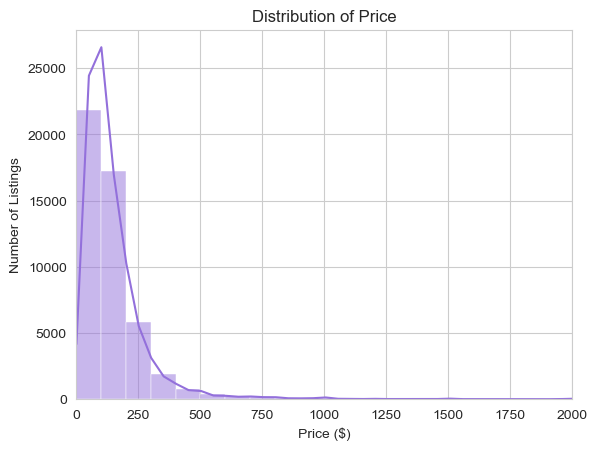

In [8]:
#Visualize the distribution of the 'price' 
sns.set_style('whitegrid')
sns.histplot(df['price'], bins=100, kde=True, color='mediumpurple')
plt.title('Distribution of Price')
plt.xlabel('Price ($)')
plt.ylabel('Number of Listings')
plt.xlim(0, 2000)
plt.show()

Most of the listings have prices in the lower range, with a peak below $200.
There are a few listings with very high prices, which appear as outliers on the right side of the histogram. boxplot is the best choice to identifying outliers.

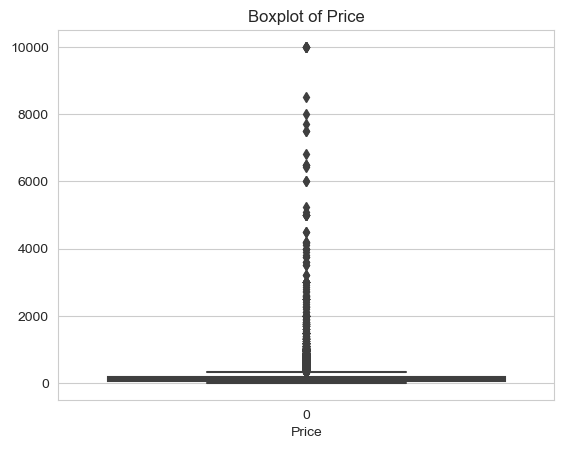

In [10]:
#Outlier and anomalies detection for 'price' using boxplot
fig, ax = plt.subplots() 
sns.boxplot(df['price'], ax=ax)
ax.set_title('Boxplot of Price')
ax.set_xlabel('Price')
plt.show()

The majority of listings are within a low range, and there are multiple outliers on the higher end which needs cleaning.

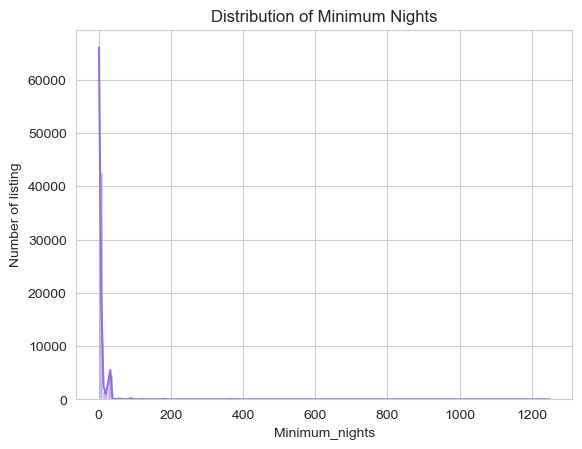

In [12]:
#visualize the distribution of the 'minimum_nights'
sns.set_style('whitegrid')
sns.histplot(df['minimum_nights'], kde=True, color='mediumpurple', bins=100)
plt.title('Distribution of Minimum Nights')
plt.xlabel('Minimum_nights')
plt.ylabel('Number of listing')
plt.show()

The majority of listings have a minimum night between 1 to 10 nights. Some of the listings have very high minimum nights which appears as an outlier. 

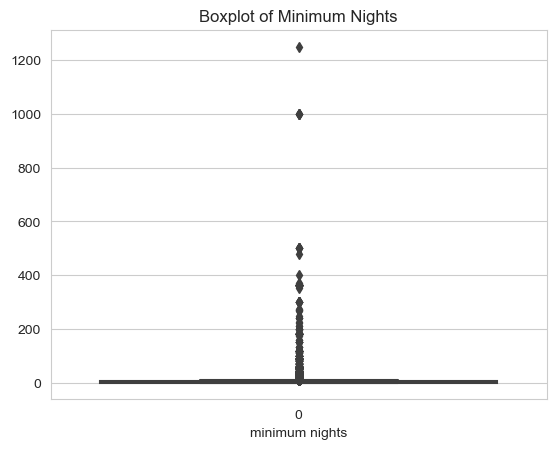

In [16]:
#Outlier and anamolies detection for 'minimum nights' using boxplot
fig, ax = plt.subplots() 
sns.boxplot(df['minimum_nights'], ax=ax )
ax.set_title('Boxplot of Minimum Nights')
ax.set_xlabel('minimum nights')
plt.show()

Several outliers on the higher end need to be removed.

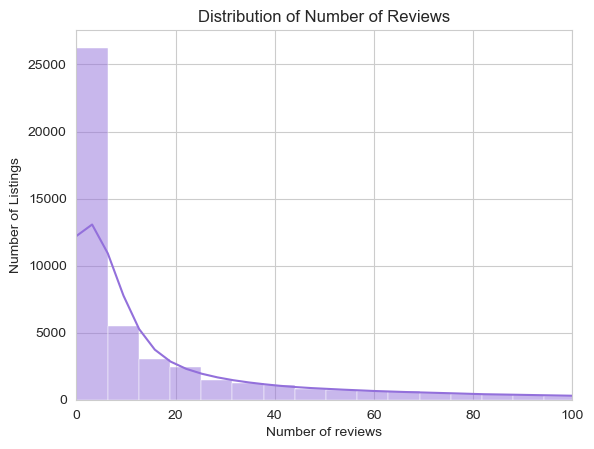

In [14]:
#visualize the distribution of the 'number_of_reviews' 
sns.set_style('whitegrid')
sns.histplot(df['number_of_reviews'], bins=100, kde=True, color='mediumpurple')
plt.title('Distribution of Number of Reviews')
plt.xlabel('Number of reviews')
plt.ylabel('Number of Listings')
plt.xlim(0, 100)  
plt.show()

The large number of listings have received few reviews with a peak close to 0.

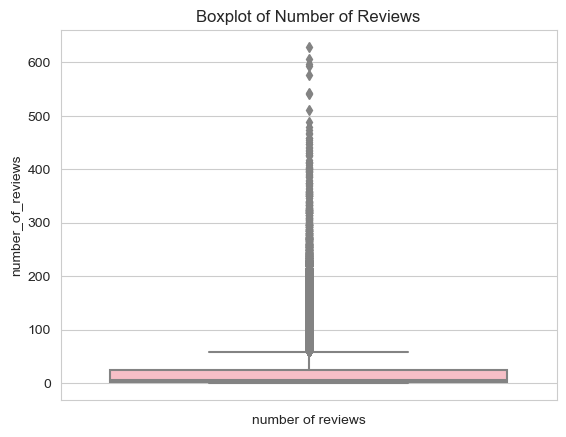

In [15]:
#Outlier and anamolies detection for 'number_of_reviews' using boxplot
fig, ax = plt.subplots() 
sns.boxplot(y=df['number_of_reviews'], ax=ax, color='lightpink')
ax.set_title('Boxplot of Number of Reviews')
ax.set_xlabel('number of reviews')
plt.show()

Boxplot shows multiple oultiers on the higher end indicating listings with an unusual high number of reviews.

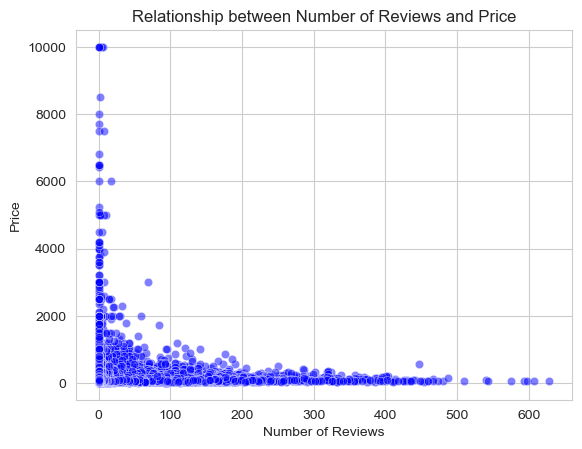

In [17]:
#scatterplot 'number_of_reviews' and 'price'
sns.scatterplot(data=df, x='number_of_reviews', y='price', alpha=0.5, color='blue')
plt.title('Relationship between Number of Reviews and Price')
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.show()

Most of the listings have a lower number of reviews. After removing outliers, further analysis is required.

In [19]:
# Calculate IQR and identify potential outliers for 'price' using the provided method
from scipy.stats import iqr
iqr_value = iqr(df['price'])
lower_bound = np.quantile(df['price'], 0.25) - 1.5 * iqr_value
upper_bound = np.quantile(df['price'], 0.75) + 1.5 * iqr_value
outliers_df = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

outliers_df[['price']].head()

,price
61,375
85,800
103,500
114,350
121,400


The result displays the first few prices with their row number of the original df that have been identified as outliers based on the IQR method. 

In [20]:
#Capping 'price' to remove extreme outliers
cap_price=df['price'].quantile(0.95)
df['price']=df['price'].apply(lambda x: cap_price if x> cap_price else x)
df['price'].max()

355.0

The maximum price in the dataset is now $355 means any listing with a price above this amount has been replaced by this value.

In [21]:
#Capping the 'minimum_nights'
cap_min_nights= df['minimum_nights'].quantile(0.95)
df['minimum_nights'] = df['minimum_nights'].apply(lambda x: 30 if x > 30 else x) 
df['minimum_nights'].max()

30

The maximum "minimum_nights" has been capped at 30 nights means any listing with nights above this amount has been replaced by this value.


# Correlation analysis

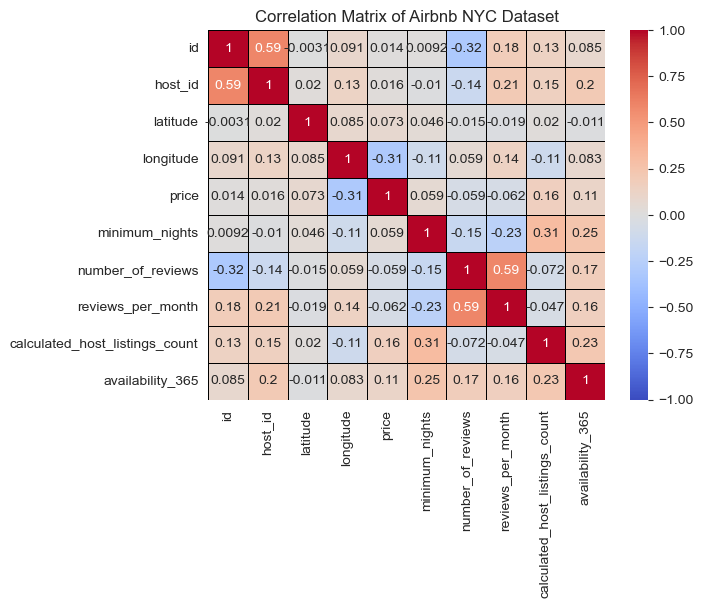

In [22]:
#correlatin analysis between numerical values using heatmap
corr_matrix = df.corr(numeric_only= True)
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, linecolor='black')
plt.title('Correlation Matrix of Airbnb NYC Dataset')
plt.show()

"number_of_reviews" and "reviews_per_month" have a positive correlation of approximately 0.59, which is expected since listings with more reviews are likely to have a higher frequency of reviews per month.
"number_of_reviews" and "price" have a correlation coefficient of -0.05, which indicates a weak negative corr meaning as the number of reviews increases the price of the listing tends to decrease.

# Categorical Data Analysis

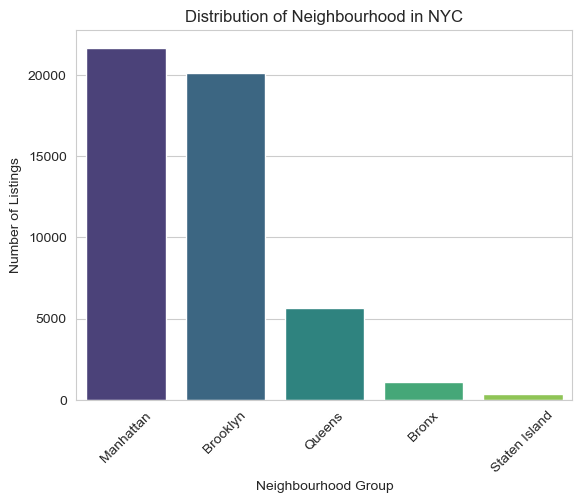

In [23]:
#Neighbourhood_group Analysis
#neighbourhood distribution based on boroughs
sns.countplot(data=df, x='neighbourhood_group',palette='viridis', order=df['neighbourhood_group'].value_counts().index)
plt.title('Distribution of Neighbourhood in NYC')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()


Manhattan and Brooklyn have the highest number of listings. Staten Island has the least number of listings.

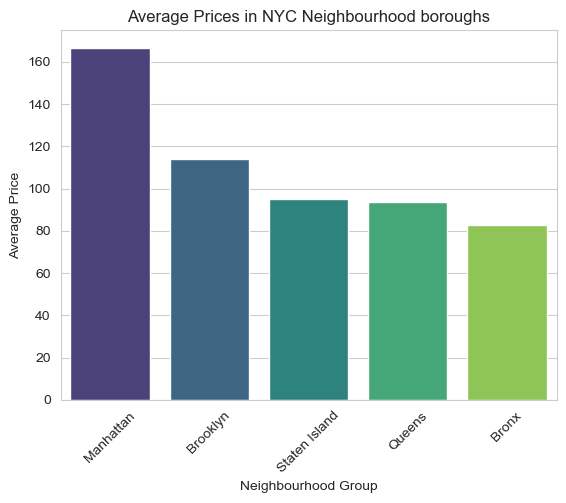

In [24]:
#average "prices" vs "neighbourhood_group"
sns.barplot(data=df, x='neighbourhood_group', y='price', errorbar=None , palette= 'viridis',
           order=df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False).index)
plt.title('Average Prices in NYC Neighbourhood boroughs')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

Manhattan had the highest average price among all boroughs, Brooklyn with $116 average price per night followed by Manhattan. Queens and Staten Island appear to have very similar average prices, Bronx being the leaset expensive on average.

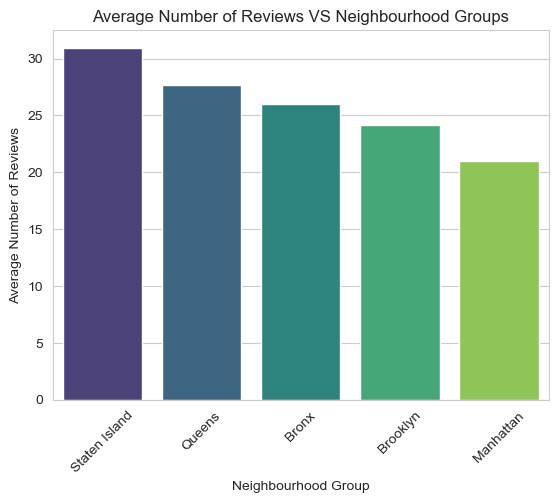

In [25]:
#average "number_of_reviews" vs "neighbourhood_group"
sns.barplot(data=df, x='neighbourhood_group', y='number_of_reviews', palette= 'viridis', errorbar=None, 
           order=df.groupby('neighbourhood_group')['number_of_reviews'].mean().sort_values(ascending=False).index)
plt.title('Average Number of Reviews VS Neighbourhood Groups')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Number of Reviews')
plt.xticks(rotation=45)
plt.show()

Staten Island, despite having fewer listings, has a higher average number of reviews. Manhattan has the lowest average reviews of all listings.
Let's dive into the data and find out if is there any relationship between the lower price and the highest average number of reviews. It seems that when people pay for expensive accomadation they are more likely to write a review specially if they are not satisfied with the service.

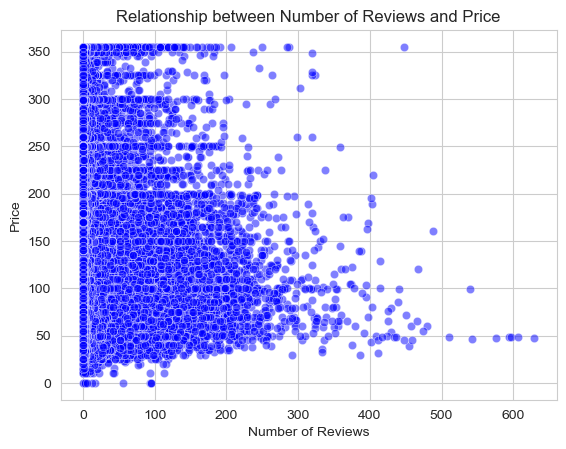

In [26]:
#scatterplot 'number_of_reviews' and capped 'price'
sns.scatterplot(data=df, x='number_of_reviews', y='price', alpha=0.5, color='blue')
plt.title('Relationship between Number of Reviews and Price')
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.show()

 Since we capped the price to 350, it still shows that the majority of listings, regardless of their price, have a lower number of reviews.

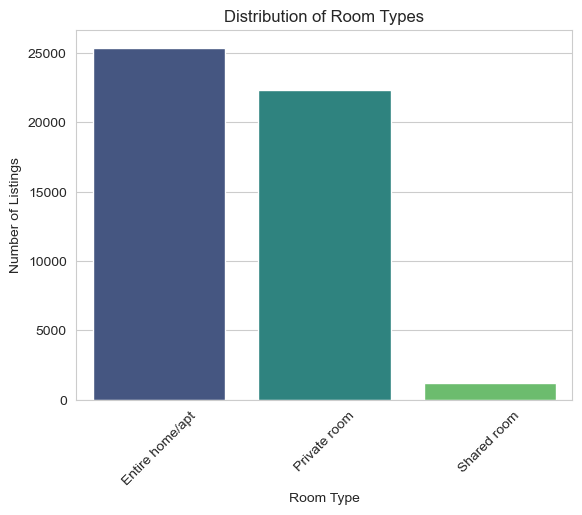

In [27]:
#room type distribution
sns.countplot(data=df, x='room_type', palette='viridis', order=df['room_type'].value_counts().index)

plt.title('Distribution of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()

Entire home/apt is the most popular among listings. Private room follows closely and shared room is the least preferred among listings.

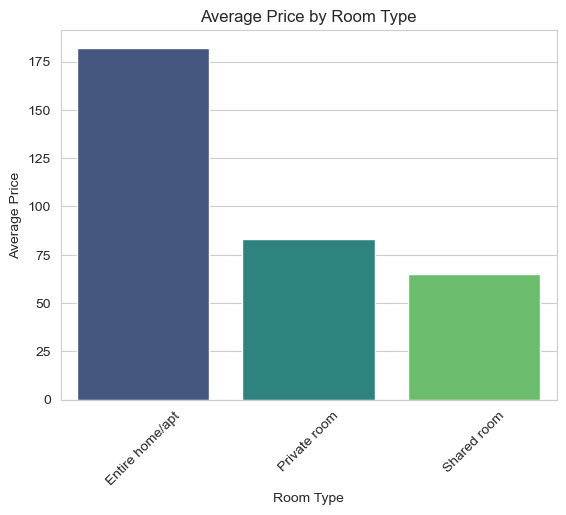

In [28]:
#Barplot 'room_type' vs "price"
sns.barplot(x='room_type', y='price', data=df, errorbar=None, palette='viridis', order=df['room_type'].value_counts().index)
plt.title('Average Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

Based on the barplot it is obvious that level of privacy and space play a significant role in determining the price of listings.

In [29]:
#Find the top 10 most reviews
top_10_reviewed= df.nlargest(10, 'number_of_reviews')
top_10_reviewed[['name', 'number_of_reviews', 'price', 'room_type', 'neighbourhood_group']]

,name,number_of_reviews,price,room_type,neighbourhood_group
11759,Room near JFK Queen Bed,629,47.0,Private room,Queens
2031,Great Bedroom in Manhattan,607,49.0,Private room,Manhattan
2030,Beautiful Bedroom in Manhattan,597,49.0,Private room,Manhattan
2015,Private Bedroom in Manhattan,594,49.0,Private room,Manhattan
13495,Room Near JFK Twin Beds,576,47.0,Private room,Queens
10623,Steps away from Laguardia airport,543,46.0,Private room,Queens
1879,Manhattan Lux Loft.Like.Love.Lots.Look !,540,99.0,Private room,Manhattan
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,510,48.0,Private room,Queens
4870,Private brownstone studio Brooklyn,488,160.0,Entire home/apt,Brooklyn
471,LG Private Room/Family Friendly,480,60.0,Private room,Brooklyn


In [30]:
#calculating the average price of these top 10 reveiwed
avg_price_top_10= top_10_reviewed['price'].mean()
avg_price_top_10

65.4

- The average price of the top 10 most reviewed listings on Airbnb for NYC is 65.40 dollars.
- 7 out of 10 of these listings are priced under 50 dollars.
- 9 out of 10 of these listings are of the 'Private room' type.
- The top-reviewed listing among these has 629 reviews.

In [31]:
# Counting the number of top 10 reviewed listings under $50
listings_under_50 = top_10_reviewed[top_10_reviewed['price'] < 50].shape[0]
listings_under_50

7

In [32]:
# Counting the number of 'Private room' type listings
private_room_count = top_10_reviewed[top_10_reviewed['room_type'] == 'Private room'].shape[0]
private_room_count

9

In [33]:
# Extracting the highest number of reviews among the top 10
highest_reviews = top_10_reviewed['number_of_reviews'].max()
highest_reviews

629

In [34]:
# Creating a summary DataFrame with the calculated values to have a better understanding
summary_data = {
    'Metric': ['Average Price of Top 10', 'Listings Under 50', 'Private Room Count', 'Highest Number of Reviews'],
    'Value': [avg_price_top_10, listings_under_50, private_room_count, highest_reviews]}

summary = pd.DataFrame(summary_data)
summary

,Metric,Value
0,Average Price of Top 10,65.4
1,Listings Under 50,7.0
2,Private Room Count,9.0
3,Highest Number of Reviews,629.0


conclusion:
Based on our analysis we reject the null hypothesis and accept the alternative. it appears that neighborhood group, room type, and the number of reviews (to a lesser extent) do influence Airbnb listing prices in NYC. The data suggests that affordability and the type of room play significant roles in the popularity of listings. The predominance of 'Private room' type listings among the top-reviewed suggests that travelers are often looking for a balance between privacy and affordability.
